# Project: Stroke Risk Factor Analysis
## Objective: Identify key biomarkers and demographic factors contributing to stroke risk.
## Key Findings:
###        Heart Disease: Patients with heart disease showed a 16% stroke rate (vs. general population).

###        hypertension: Patients with heart disease showed a 13.3% stroke rate (vs. general population).

###        Age Factor: Median age for stroke patients is 70, indicating age is the primary driver over marital status.

# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# loading dataset

In [3]:
#loading dataset
stroke_data=pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# minor analysis to the dataset 
print(stroke_data.shape)
#5110 row and 12 columns
print(stroke_data.info())
#only column with missing value is bmi
print(stroke_data.describe())
# age has a minimum value of 0.08 which could be children

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   3651

In [8]:
# i will be doing some minor data cleaning since this is not the topic of this project
print(stroke_data.isnull().sum())
#201 null values in bmi

#replacing the null values with the median
stroke_data.fillna(stroke_data['bmi'].median(),inplace=True)
print(stroke_data.isnull().sum())

#checking for duplicates
print(stroke_data.duplicated().sum())
#no duplication



id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


# Data Visualization

Text(0.5, 0.98, 'No of people with strokes and without')

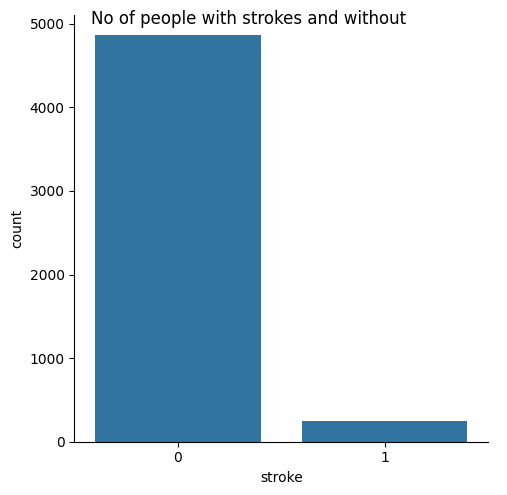

In [9]:
#first lets check the number of people with strokes or not
g=sns.catplot(kind='count',data=stroke_data,x='stroke')
g.fig.suptitle('No of people with strokes and without')
#majority of the people dont have strokes

Text(0.5, 0.98, 'no of males and females diagnosed with stroke and not diagnosed')

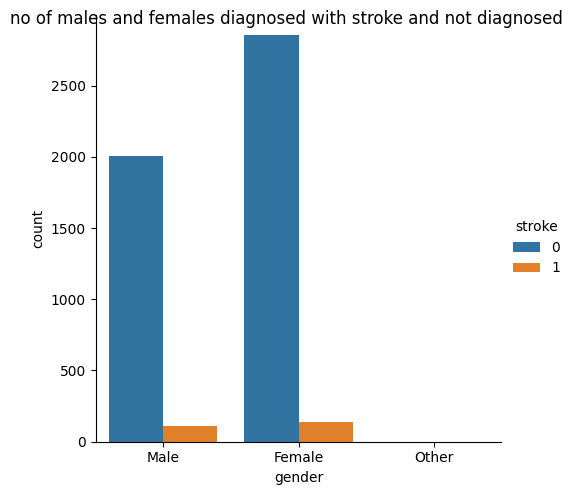

In [10]:
#now lets check if there is a gender that is more vaulnerable to strokes
g=sns.catplot(kind='count',data=stroke_data,x='gender',hue='stroke')
g.fig.suptitle('no of males and females diagnosed with stroke and not diagnosed')
#it appears that there is no noticable diffference in count between males and females who have had a stroke 
# but the dataset is biased to people who haven't hade a storoke as there are a few people who have suffered from a stroke

Text(0.5, 1.1, 'average of suffering from a stroke as a male and a female')

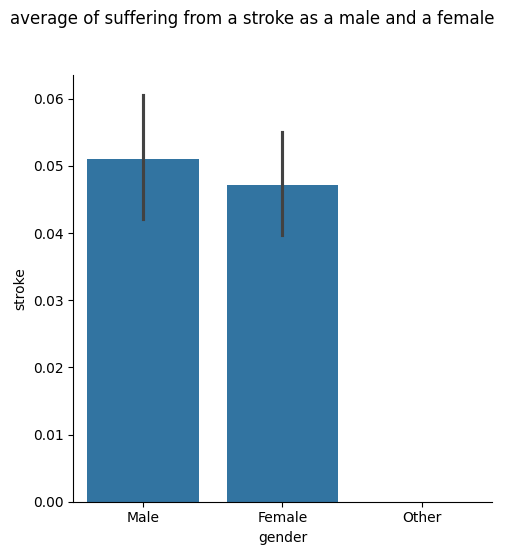

In [11]:
#checking the average of having a stroke from now on in relation to other variables since there are few people suffering from strokes in the dataset
g=sns.catplot(kind='bar',data=stroke_data,x='gender',y='stroke')
g.fig.suptitle('average of suffering from a stroke as a male and a female',y=1.1)
#the chances of having a stroke are slightly higher as a male but its a slight difference so the chances of suffering a stroke as a male or a female are the same

Text(0.5, 1.1, 'average of having a stroke when suffering from heart_disease')

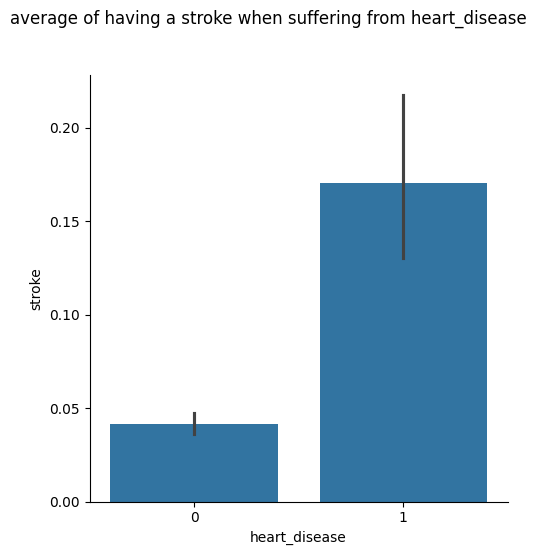

In [12]:
#cheking if heart disease is related to suffering from a stroke or not
g=sns.catplot(kind='bar',data=stroke_data,x='heart_disease',y='stroke')
g.fig.suptitle('average of having a stroke when suffering from heart_disease',y=1.1)
#it seems that aevrage of having a stroke when suffering from a heeart disease is higher by around 10% which means there is a direct relation between having heart disease and a suffering from a stroke

Text(0.5, 1.1, 'average of having a stroke when suffering from hypertension')

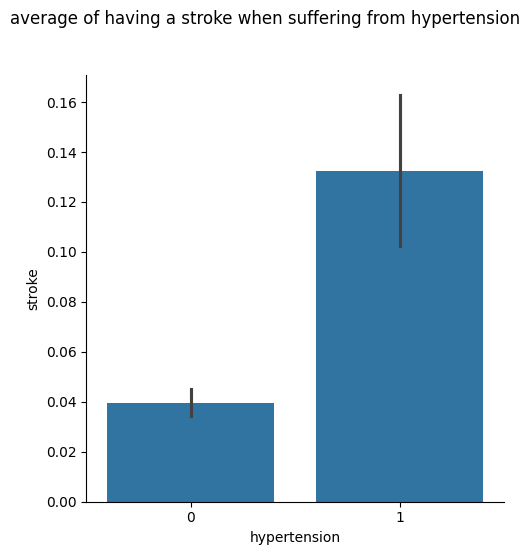

In [13]:
#checking if suffering from hypertension is related to having a stroke
g=sns.catplot(kind='bar',data=stroke_data,x='hypertension',y='stroke')
g.fig.suptitle('average of having a stroke when suffering from hypertension',y=1.1)
#it seems that average of having a stroke when suffering from hypertension is higher by around 10% which means there is a direct relation between having hypertension and  suffering from a stroke


Text(0.5, 1.1, 'age of people who suffered from a stroke and havent suffered from one ')

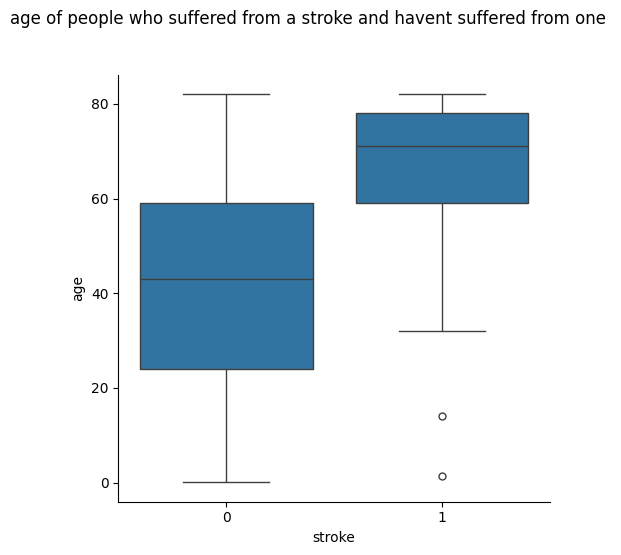

In [14]:
#checking if age affects in having a stroke or not
g=sns.catplot(kind='box',data=stroke_data,x='stroke',y='age')
g.fig.suptitle('age of people who suffered from a stroke and havent suffered from one ',y=1.1)
#the median of people who have sufffered from a stroke is between 60 and 80 meanwhile people who havent suffered from a stroke are spread out through all ages so we can say that you dont have to be old to or you to suffer from a stroke but you are more vaulnerbale to suffer from one at an older age

Text(0.5, 1.1, 'average of having a stroke when getting married')

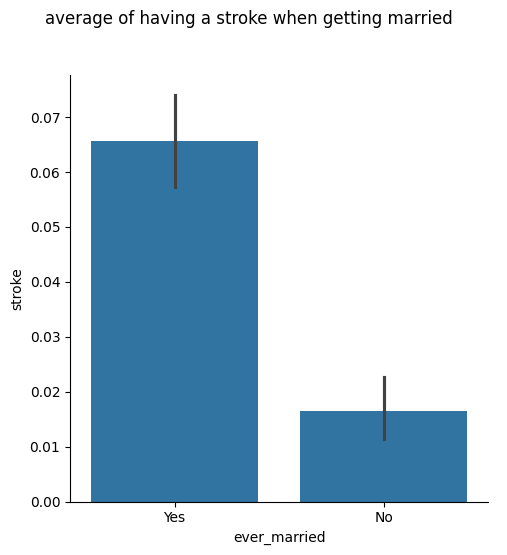

In [15]:
#checking if being married makes you more prone to suffering from a stroke or not
g=sns.catplot(kind='bar',data=stroke_data,x='ever_married',y='stroke')
g.fig.suptitle('average of having a stroke when getting married',y=1.1)
#it seems that chances of having a stroke when married is higher by around 5 percent which might mean you are more vulnerable to having a strok while being married but there might be other factors related to it like age


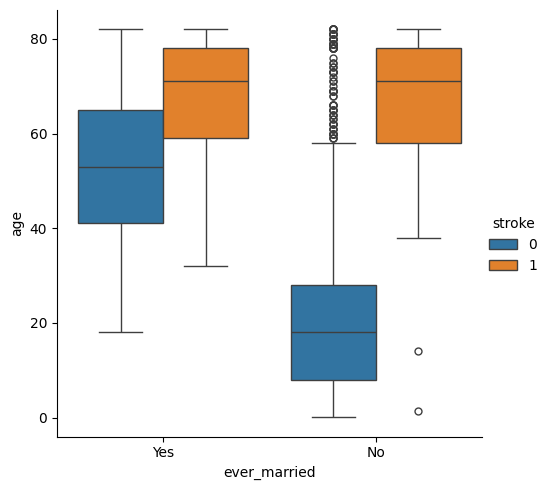

In [16]:
#checking if age is related to people being more prone to suffering from stokes when married
sns.catplot(kind='box',data=stroke_data,x='ever_married',y='age',hue='stroke')
#it apears that people who were married and weren't married have strokes at the same age range this means that the people who have had a stroke before and were married were likely vulnerable to it due to high age and likely other factors
#but the people who were  married and had a stroke are more spread out to below the age of 40

Text(0.5, 1.1, 'average of having a stroke when getting married under 40 years old')

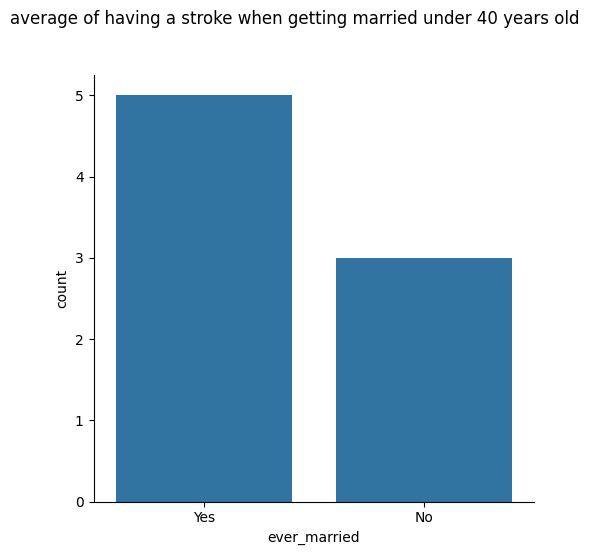

In [17]:
#checking if being married under the  age of 40 is related to having  a stroke
k=stroke_data[(stroke_data['age']<40)&(stroke_data['stroke']==1)]
g=sns.catplot(kind='count',data=stroke_data,x=k['ever_married'])
g.fig.suptitle('average of having a stroke when getting married under 40 years old',y=1.1)
#its seems that we can't identify if there is a relation or not because there is only 6 people under the age of 40 and suffered a stroke in the datset so we can say that there is no relation or there might be a slight relation between being married and suffering from a stroke due to stress

Text(0.5, 1.1, 'chances of suffering from a stroke while being married and having hypertension or not')

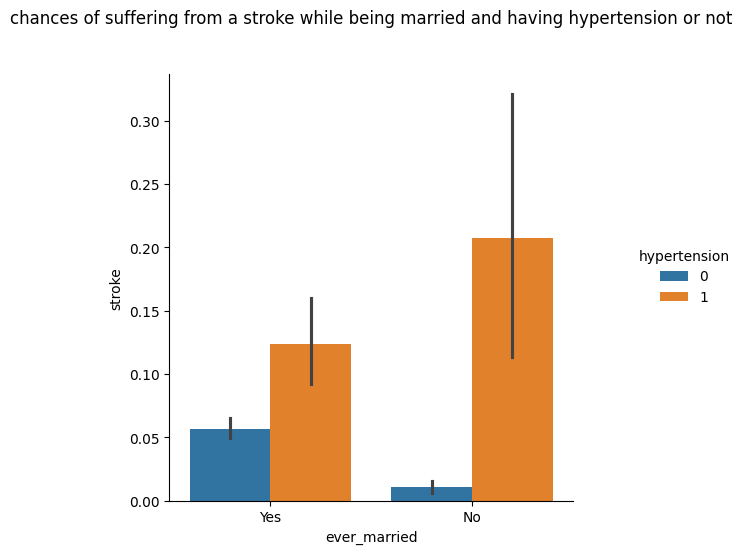

In [18]:
#checking a ralation between hypertension and ever marrying and having a stroke
sns.catplot(data=stroke_data,kind='bar',x='ever_married',y='stroke',hue='hypertension')
plt.title('chances of suffering from a stroke while being married and having hypertension or not',y=1.1)
#this shows theat the chances of suffering from a stroke while having hypertension when not married are higher which proves the marriage is not related

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children'),
  Text(4, 0, 'Never_worked')])

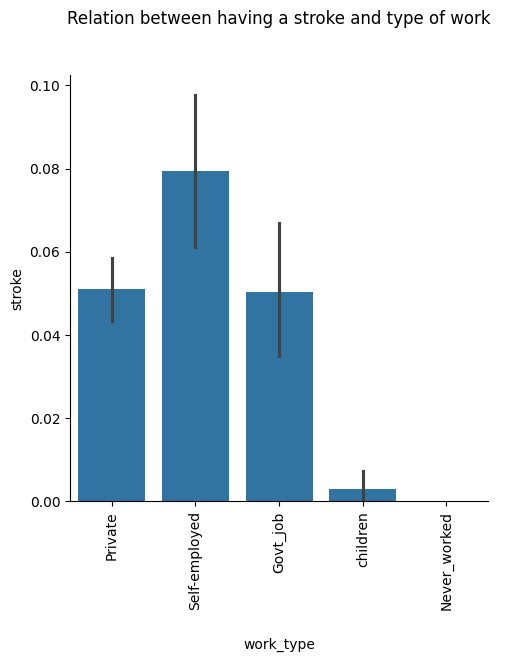

In [19]:
#relation between type of job and having a stroke
g=sns.catplot(x='work_type',y='stroke',kind='bar',data=stroke_data)
plt.title('Relation between having a stroke and type of work',y=1.1)
g.set_xlabels(labelpad=20)
plt.xticks(rotation=90)
#people who have a job are more prone to getting a stroke especially if you are self-employed

Text(0.5, 1.1, 'Relation between having a stroke under the age of 40 and type of work')

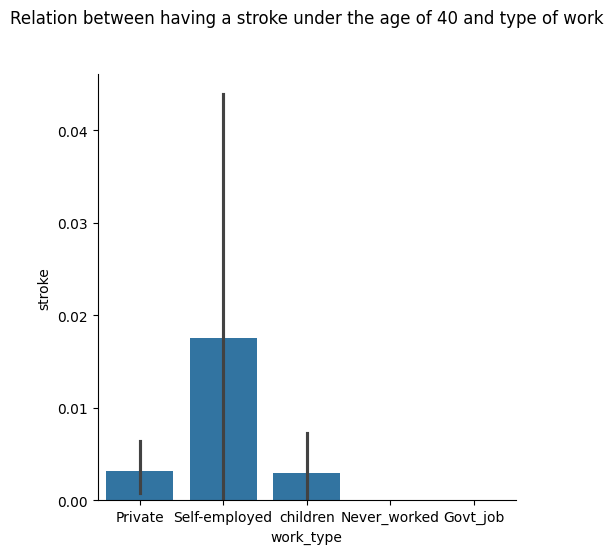

In [20]:
#lets see if the relationship is a result of age.
k=stroke_data[(stroke_data['age']<=40)]
g=sns.catplot(x='work_type',y='stroke',kind='bar',data=k)
plt.title('Relation between having a stroke under the age of 40 and type of work',y=1.1)
#people who are self employed still are the most vulnerable to strokes under the age of 40 which means work can lead to stress which  might lead to a stroke especially when self employed

Text(0.5, 1.1, 'relation between residence and having a stroke')

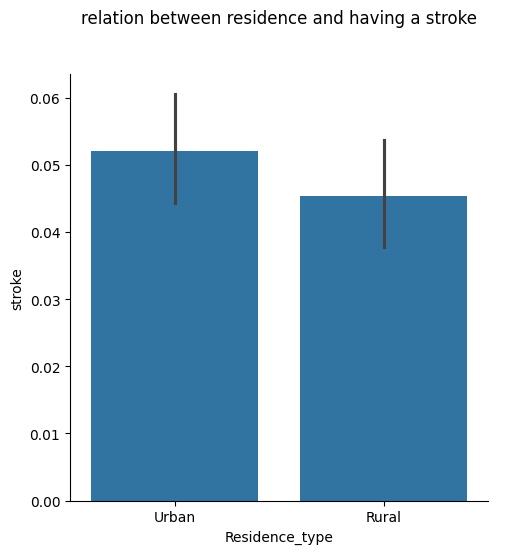

In [21]:
#relation between residence and having a stroke
g=sns.catplot(x='Residence_type',y='stroke',kind='bar',data=stroke_data)
plt.title('relation between residence and having a stroke',y=1.1)
#both types are equally vulnerable to having a stroke. urban type is a little more prone.

Text(0.5, 1.1, 'relation between avg glucose level and having a stroke')

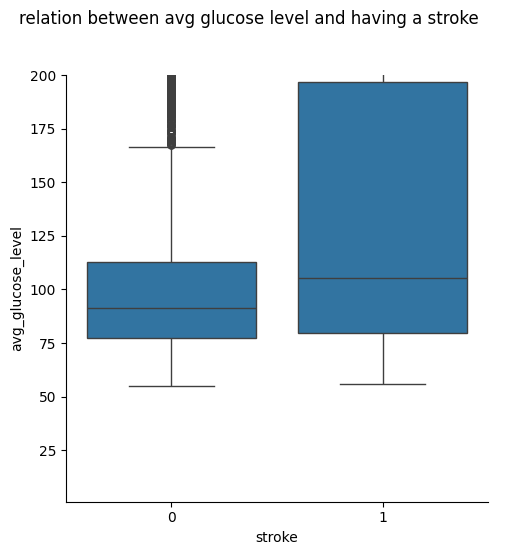

In [22]:
#relation between avg glucose level and having a stroke
g=sns.catplot(x='stroke',y='avg_glucose_level',kind='box',data=stroke_data)
plt.ylim(1,200)
g.fig.suptitle('relation between avg glucose level and having a stroke',y=1.1)
#it seems that the glucose level of people who have had a stroke is more spread out to the higher range of values starting from 50 to more than 200 with a median of close to 100.
#and the glucose level of people who havent had a stroke is spread out at lesser values starting from 50 to around 150 with outliers that are spread at a higher range of over 175. the median glucose level of people that havent suffered a stroke is around 80


Text(0.5, 1.1, 'avg glucose level for people who have and those who havent suffered from a stroke')

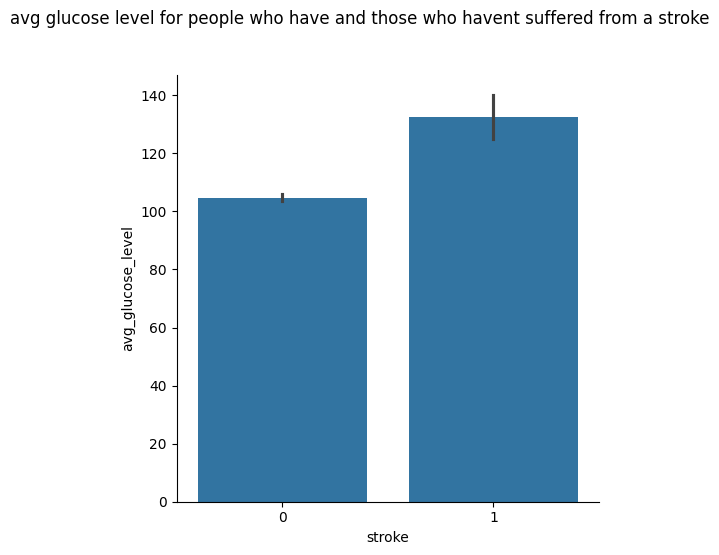

In [23]:
#checking the mean glucose level
g=sns.catplot(x='stroke',y='avg_glucose_level',kind='bar',data=stroke_data)
g.fig.suptitle('avg glucose level for people who have and those who havent suffered from a stroke',y=1.1)
#avg  glucose level for people who suffered from a stroke is  around 130 and the havent is around 100.
#the conclusion: people who have suffered a stroke are likely in the prediabetic range while there are more people in the diabetic range who have suffered from a stroke with a high avg glucose value

Text(0.5, 1.0, 'relation between suffering from a stroke and avrage bmi')

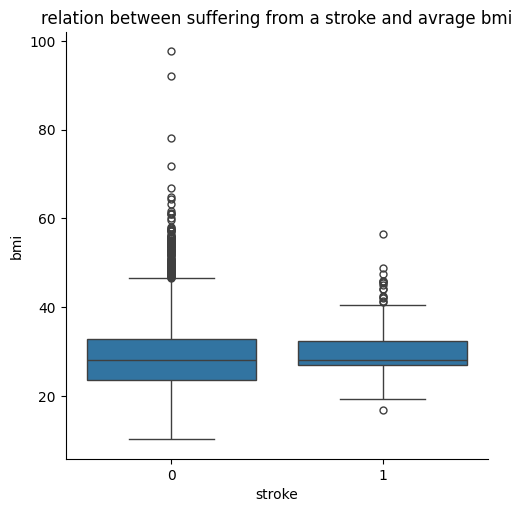

In [24]:
#relation between suffering from a stroke and avrage bmi
sns.catplot(kind='box',data=stroke_data,x='stroke',y='bmi')
plt.title('relation between suffering from a stroke and avrage bmi')
#it appears that there is no difference between having a stroke and not  when related to bmi as that people who have suffered from a stroke have a bmi median of around 30. 
#we should also point out that they both have outliers so its best to use there median when comparing suffering from a stroke and bmi level

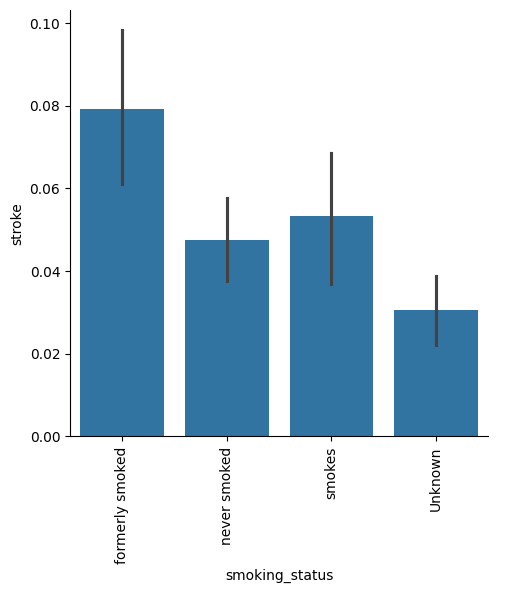

In [25]:
#relation between smoking status and strok
sns.catplot(kind='bar',x='smoking_status',y='stroke',data=stroke_data)
plt.xticks(rotation=90)
plt.show()
#this is interesting. the probability of suffering a stroke for the people who formerly smoked is the highest. this might have a relation with age. we will check that soon.
#there is also not a big difference between people who never smoked and people who smoked when suffering from a stroke.
#this might mean that there is not relation between smoking and having a stroke

([0, 1, 2, 3],
 [Text(0, 0, 'formerly smoked'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'Unknown')])

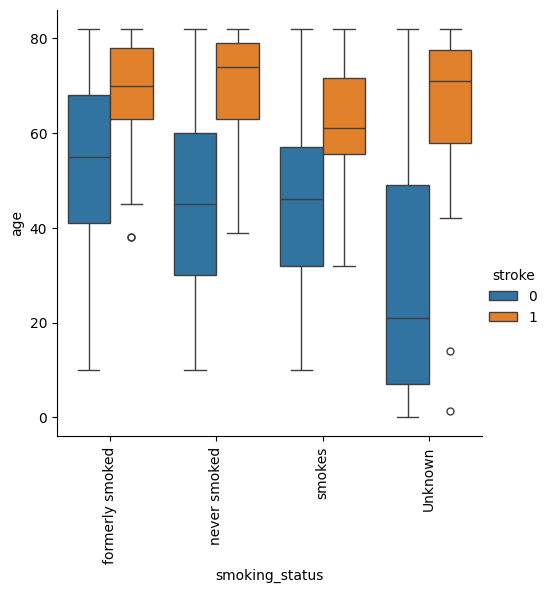

In [26]:
#lets first check people who formely smoked being more vulnerable to having a stroke if its related to age
sns.catplot(kind='box',x='smoking_status',y='age',data=stroke_data,hue='stroke')
plt.xticks(rotation=90)
#there is no proof that age is related to people who formerly smoked suffering from a stroke because every status spread out through the same age range 
#but there is also an indicator that people who smoke suffered from a stroke at an earlier age compared to the rest

#conclusion: since the difference in the relation between stroke and smoking status between all statuses is only around 2% its apropriate to say that there is no big relation between smoking and suffering from a stroke
# but we should also point out that you could be more prone to sufferinf a stroke at younger age if you smoke

# now we narrow down the important features that could lead to a stroke

In [27]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


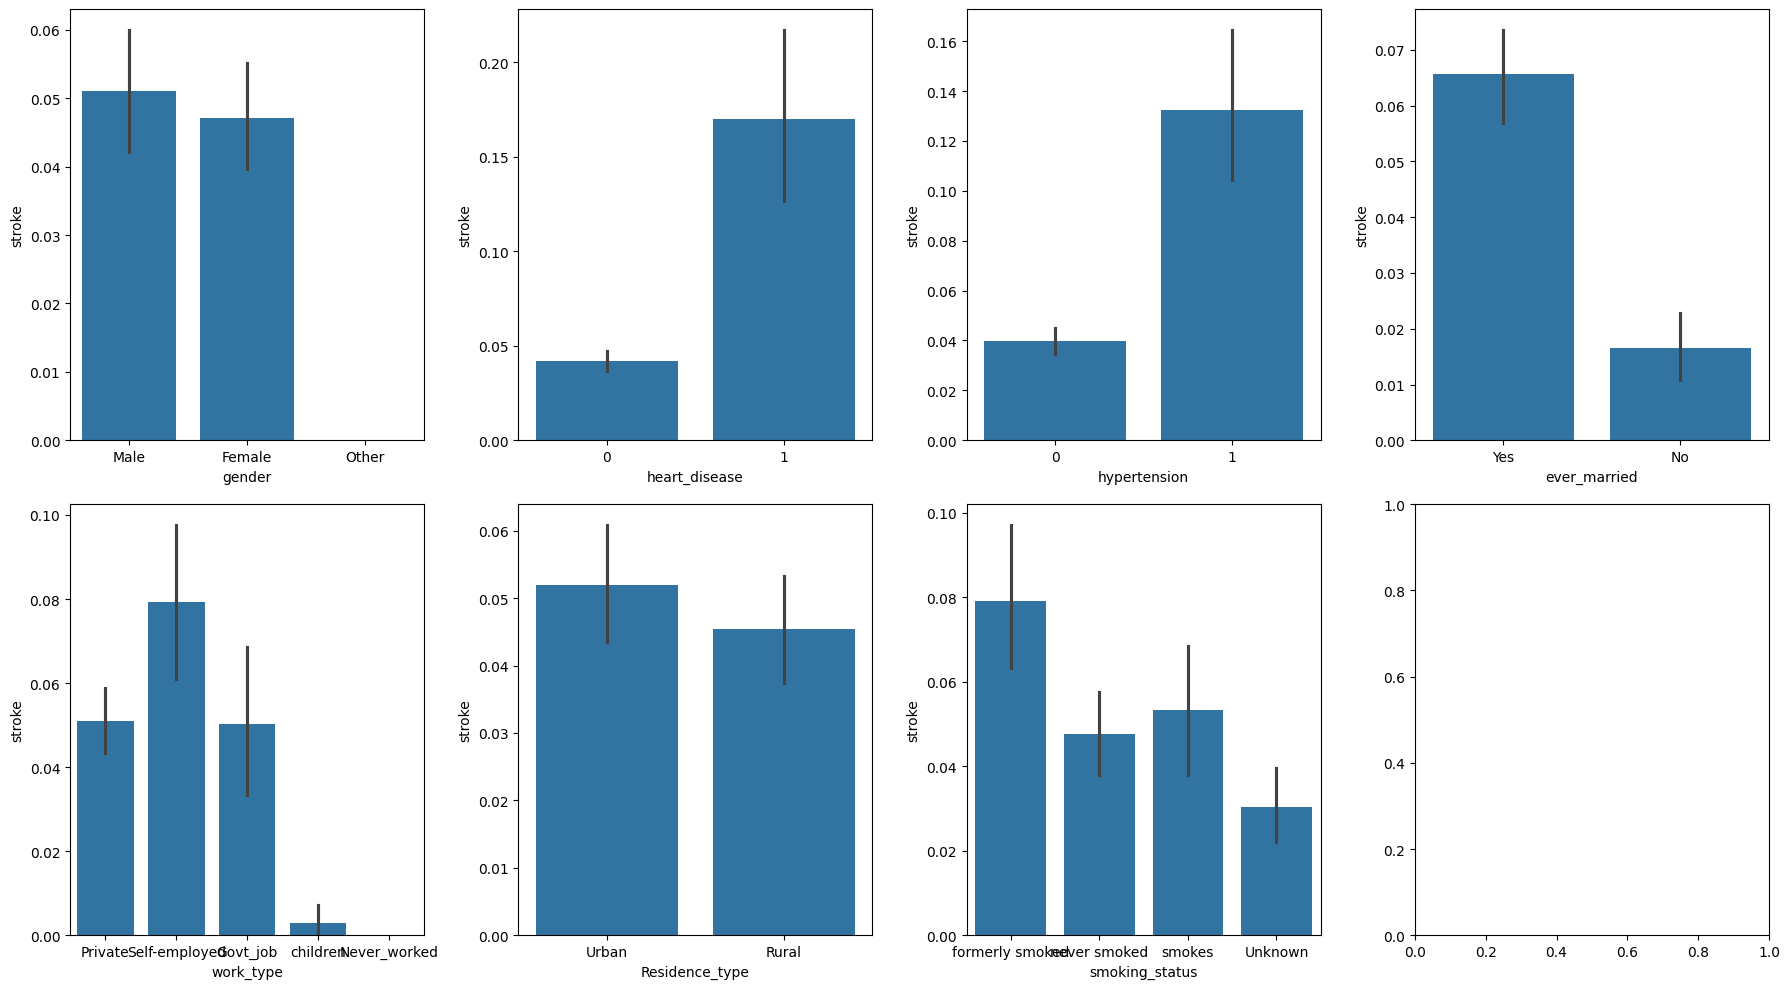

In [28]:
#lets visualize all the relationships between the features and the output
fig, axes=plt.subplots(2,4,figsize=(18,10))
sns.barplot(data=stroke_data,x='gender',y='stroke',ax=axes[0,0])
sns.barplot(data=stroke_data,x='heart_disease',y='stroke',ax=axes[0,1])
sns.barplot(data=stroke_data,x='hypertension',y='stroke',ax=axes[0,2])
sns.barplot(data=stroke_data,x='ever_married',y='stroke',ax=axes[0,3])
sns.barplot(data=stroke_data,x='work_type',y='stroke',ax=axes[1,0])
sns.barplot(data=stroke_data,x='Residence_type',y='stroke',ax=axes[1,1])
sns.barplot(data=stroke_data,x='smoking_status',y='stroke',ax=axes[1,2])
plt.tight_layout()

In [29]:
#we deducted the 2 biggest indicators to having a stroke are heart disease and hypertension so lets group them together and see
group = stroke_data[(stroke_data['hypertension'] == 1) & (stroke_data['heart_disease'] == 1)]
rates=group['stroke'].value_counts(normalize=True) * 100
print(rates)
#there is 19 percent of people who suffer from a stroke out of the people who have both hypertension and heart disease which is not a small number 
#lets check the difference in percentages between when suffering from both and only one of the 2 to see if there is a noticable difference
hypertension_group = stroke_data[(stroke_data['hypertension'] == 1)]
rates=hypertension_group['stroke'].value_counts(normalize=True) * 100
print(rates)
#there is 13 percent out of  people suffer from a stroke when suffering from hypertension 
heart_disease_group = stroke_data[(stroke_data['heart_disease'] == 1)]
rates=heart_disease_group['stroke'].value_counts(normalize=True) * 100
print(rates)
#there is 16 percent of people suffer from a stroke when suffering from heart disease

#we can conclude that there is around a 6 percent increase when suffering from both diseases compared to only suffering from hypertension
# and there is around a 3 percent increase when suffering  from both diseases compared to only suffering from heart disease 
#there numbers are not small in healthcare

stroke
0    79.6875
1    20.3125
Name: proportion, dtype: float64
stroke
0    86.746988
1    13.253012
Name: proportion, dtype: float64
stroke
0    82.971014
1    17.028986
Name: proportion, dtype: float64


(0.0, 0.2)

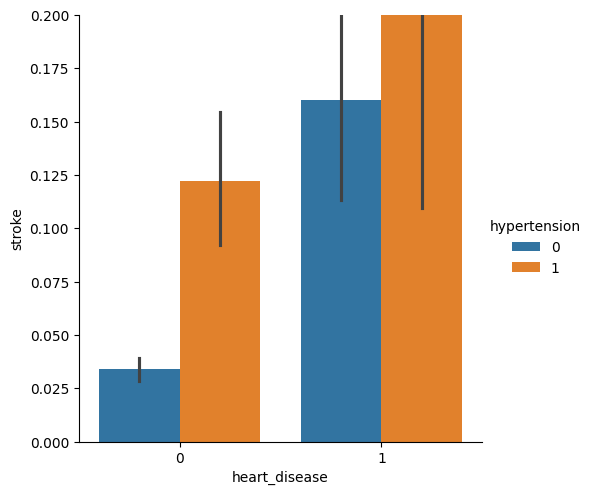

In [30]:
g=sns.catplot(kind='bar',x='heart_disease',y='stroke',hue='hypertension',data=stroke_data)
g.ax.set_ylim(0, 0.2)
#this tells there is around 2% increase when suffering from both diseases than just suffering of one
# and a huge 1% increase from suffering from just hypertension to  suffering from both
#this means that heart disease has the biggest impact on having a stroke

stroke
0    86.42638
1    13.57362
Name: proportion, dtype: float64


(0.0, 0.25)

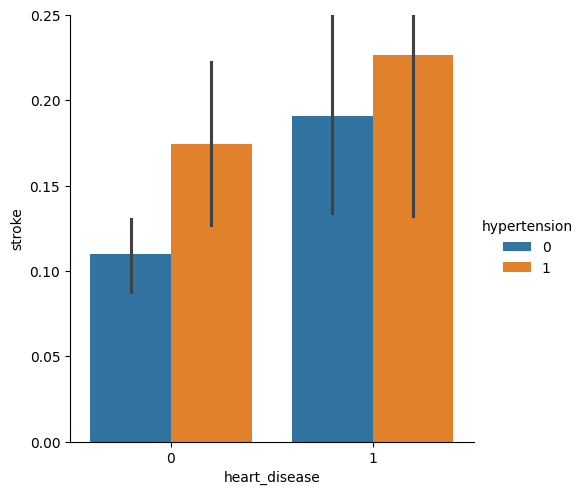

In [31]:
#checking the symptoms of  people who are older than 60 who have suffered a stroke
old_people=stroke_data[(stroke_data['age']>60)]
rates=old_people['stroke'].value_counts(normalize=True)*100
print(rates)
#12% of the people older than 60 in the dataset haver suffered from a stroke
g=sns.catplot(
    kind='bar',
    data=old_people,
    x='heart_disease',
    y='stroke',
    hue='hypertension',
    )
plt.ylim(0,0.25)
#this shows that having heart disease only when you are above 60 can increase your rate of suffering from a stroke by around 9% and suffering from hypertension only can increase the chances of suffering from a stroke by around 10% and suffering from both increases the chances by 14%


stroke
0     95.88
1    110.85
Name: avg_glucose_level, dtype: float64

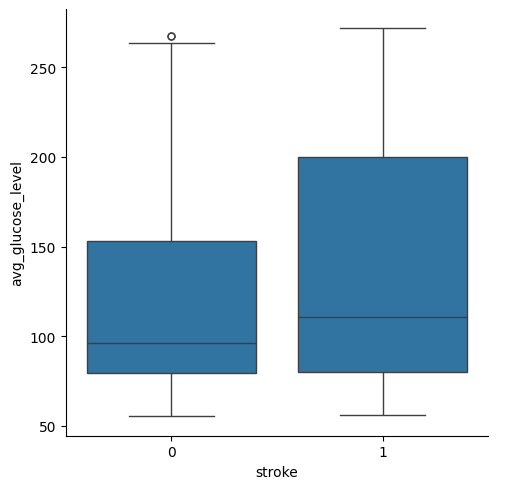

In [32]:
#now we will check the symptoms of older people suffering from a stroke based on glucose level 
sns.catplot(data=old_people,
            kind='box',
            x='stroke',
            y='avg_glucose_level'
            )
old_people.groupby('stroke')['avg_glucose_level'].median()
#as we previously stated with all people, old people who have suffered a stroke are in the prediabitic range with a median of 116 and are more distrubuted over 100 while people who havenet are below 100

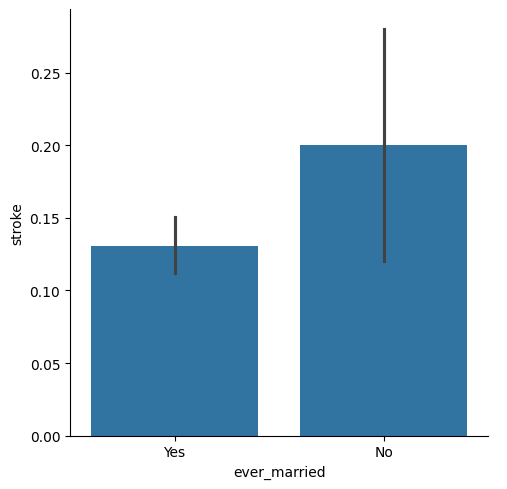

In [33]:
#now we will check the symptoms of older people suffering from a stroke based on ever marrying
sns.catplot(data=old_people,
            kind='bar',
            x='ever_married',
            y='stroke'
            )
#this is interesting to see because the probability of suffering from a stroke when never marrying is higher which is different from the general dataset where people who married before had a higher probability of suffering from a stroke


# Key Insights

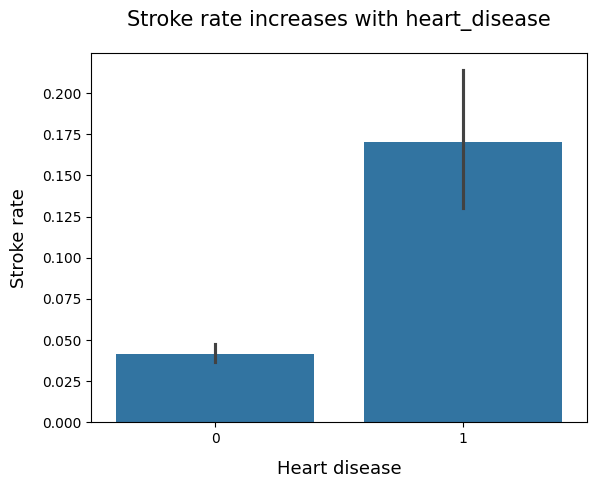

stroke
0    82.971014
1    17.028986
Name: proportion, dtype: float64


In [34]:
sns.barplot(data=stroke_data,x='heart_disease',y='stroke')
plt.title('Stroke rate increases with heart_disease',y=1.05,fontsize=15)
plt.ylabel('Stroke rate',labelpad=10,fontsize=13 )
plt.xlabel('Heart disease', labelpad= 10 , fontsize= 13)
plt.show()
heart_disease_group = stroke_data[(stroke_data['heart_disease'] == 1)]
rates=heart_disease_group['stroke'].value_counts(normalize=True) * 100
print(rates)
#there are 16 percent of people in the dataset who suffer from a stroke when suffering from heart disease


stroke
0    86.746988
1    13.253012
Name: proportion, dtype: float64


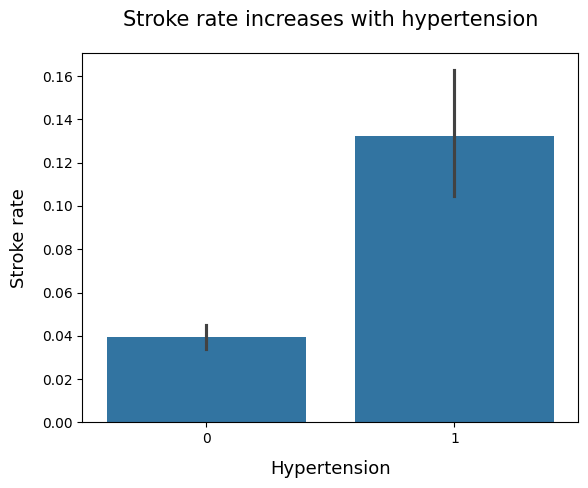

In [35]:
hypertension_group = stroke_data[(stroke_data['hypertension'] == 1)]
rates=hypertension_group['stroke'].value_counts(normalize=True) * 100
print(rates)
sns.barplot(data=stroke_data,x='hypertension',y='stroke')
plt.title('Stroke rate increases with hypertension',y=1.05,fontsize=15)
plt.ylabel('Stroke rate',labelpad=10,fontsize=13 )
plt.xlabel('Hypertension', labelpad= 10 , fontsize= 13)
plt.show()
#there are 13.3% percent of people in the dataset who suffer from a stroke when suffering from heart disease

stroke
0    43.0
1    71.0
Name: age, dtype: float64


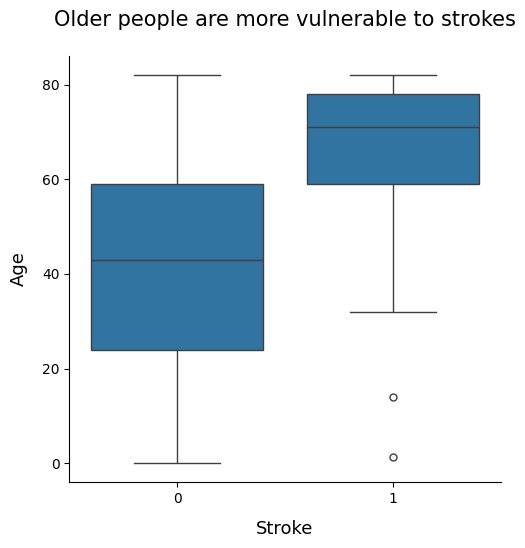

In [36]:
g=sns.catplot(kind='box',data=stroke_data,x='stroke',y='age')
median=stroke_data.groupby('stroke')['age'].median()
print(median)
plt.title('Older people are more vulnerable to strokes',y=1.05, fontsize= 15)
plt.ylabel('Age',labelpad=10,fontsize=13 )
plt.xlabel('Stroke', labelpad= 10 , fontsize= 13)
plt.show()
#people who suffer from a stroke are older with a median of 70 years in the dataset

# Heart disease, hypertension, and age show the strongest associations with stroke in this dataset

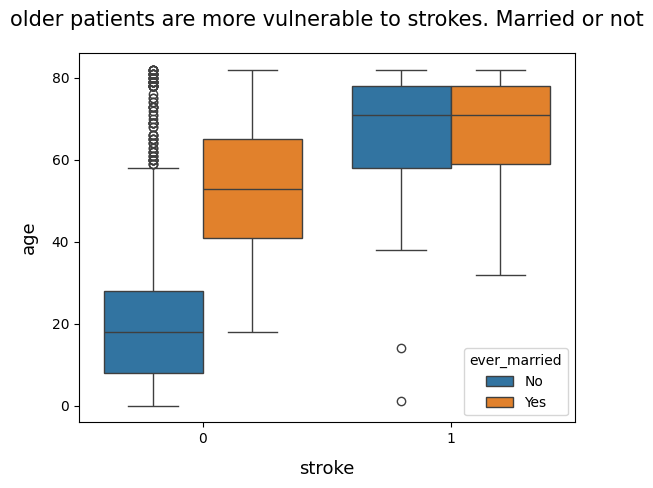

In [37]:
sns.boxplot(data=stroke_data,x='stroke',y='age',hue='ever_married')
plt.title('older patients are more vulnerable to strokes. Married or not',y=1.05,fontsize=15)
plt.ylabel('age',labelpad=10,fontsize=13 )
plt.xlabel('stroke', labelpad= 10 , fontsize= 13)
plt.show()

# plot shows that the stroke increase is likely more related to age than being married as people who are older are more likely to have married.
